# Compare two GEOS-Chem diagnostic datasets
(using GCpy notebook)

## Import dependencies

In [1]:
import os
import numpy as np
import xarray as xr
import xbpch
import gcpy
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Enable auto-reloading modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import warnings; warnings.filterwarnings("ignore")

In /home/emfreese/anaconda3/envs/gcpy/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emfreese/anaconda3/envs/gcpy/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emfreese/anaconda3/envs/gcpy/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/emfreese/anaconda3/envs/gcpy/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emf

## Choose comparison type

In [2]:
comparison = 'nc'


## Load data

In [3]:
# Set netcdf ref data if doing nc vs nc
if comparison == 'nc':
    refdata = xr.open_mfdataset('../../GCrundirs/benchmark_annual_ref/geosfp_4x5_benchmark/OutputDir/GEOSChem.SpeciesConc.2016*_0000z.nc4')
    
# Set netcdf dev data if doing bpch vs nc
if 'nc' in comparison:
    devdata = xr.open_mfdataset('../../GCrundirs/benchmark_annual_EPA/geosfp_4x5_benchmark/OutputDir/GEOSChem.SpeciesConc.2016*_0000z.nc4')

## Set and ref and dev strings for including in plots

In [4]:
refstr='GCC NEI2011 netcdf, 12.9.3' # EDIT AS NEEDED
devstr='GCC EPA2016 netcdf, 12.9.3' # EDIT AS NEEDED
    
print('Ref: {}'.format(refstr))
print('Dev: {}'.format(devstr))

Ref: GCC NEI2011 netcdf, 12.9.3
Dev: GCC EPA2016 netcdf, 12.9.3


## Compare species concentrations
Using NO as our comparison, looking at January benchmark

### Define list of variables to plot

In [5]:
desc='NO'
varlist = ['SpeciesConc_NO']

print('{} variables found'.format(len(varlist)))
varlist

1 variables found


['SpeciesConc_NO']

### Inspect units to make sure they match

In [6]:
for var in varlist:
    print(var)
    print('   ref units: {}'.format(refdata[var].units))
    print('   dev units: {}'.format(devdata[var].units))

SpeciesConc_NO
   ref units: mol mol-1 dry
   dev units: mol mol-1 dry


### Plot Single Level Concentrations

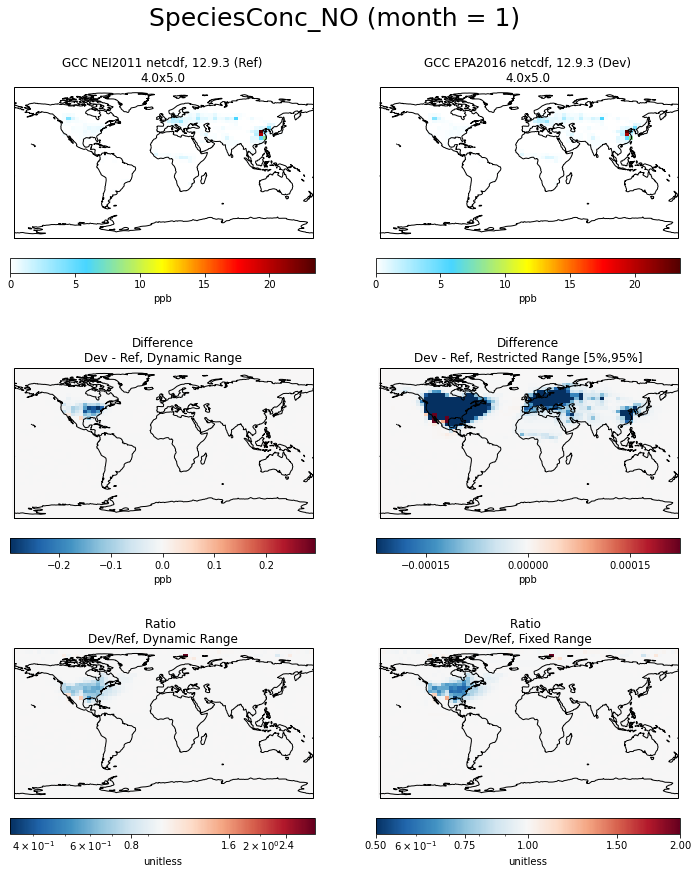

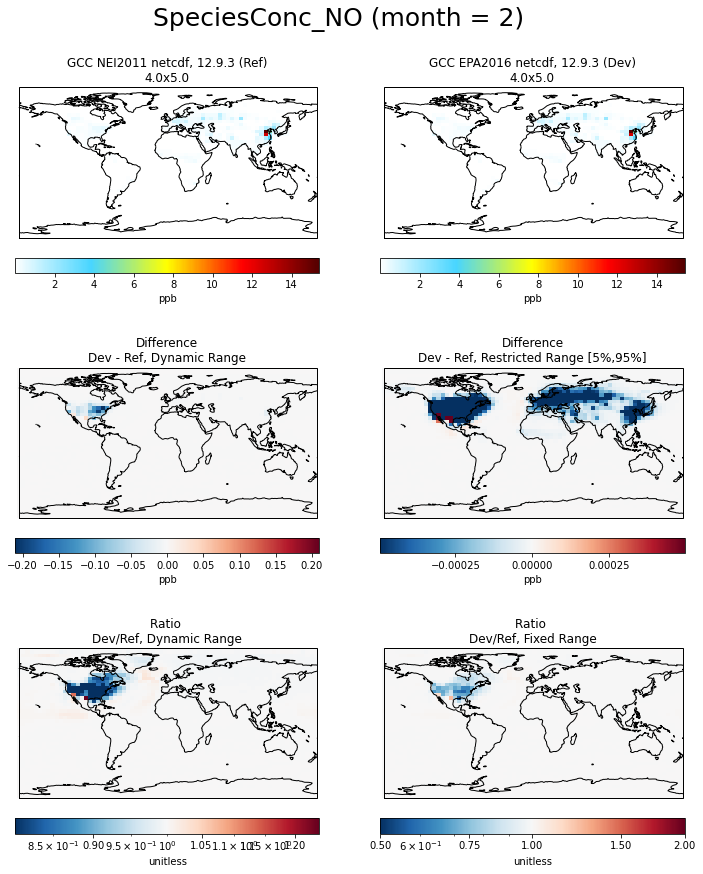

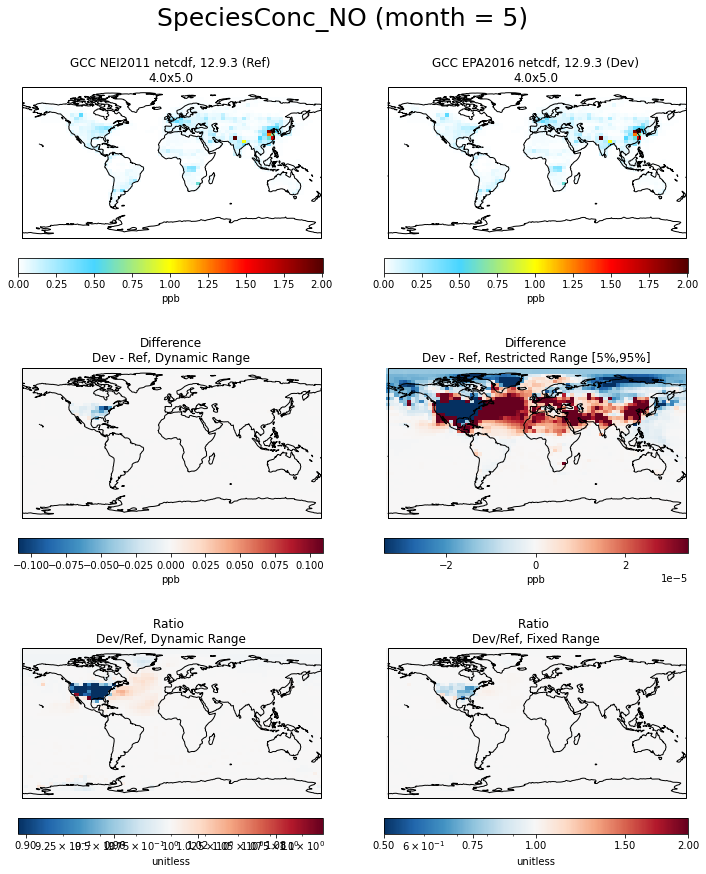

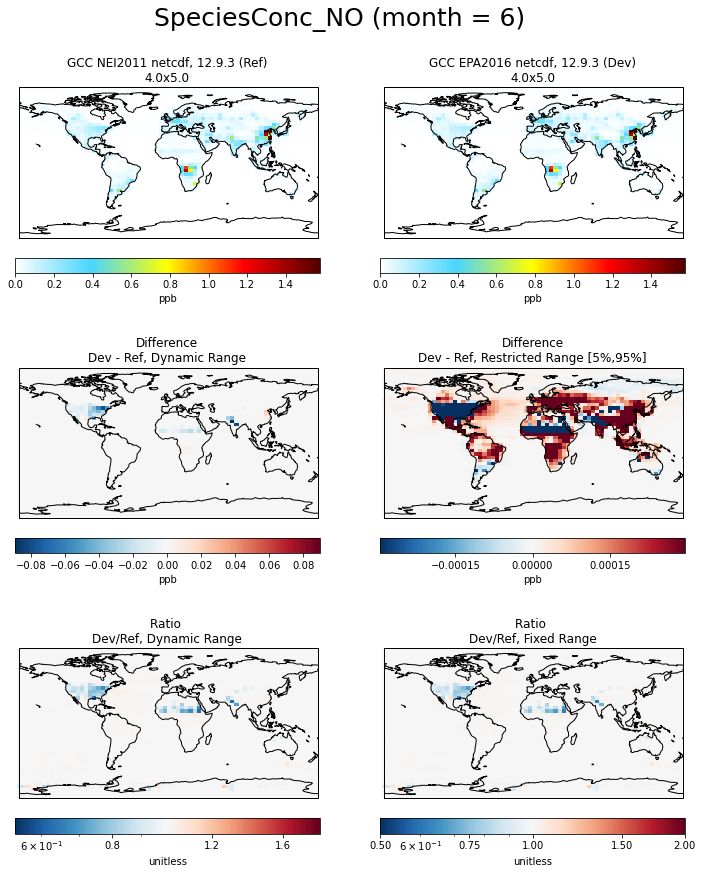

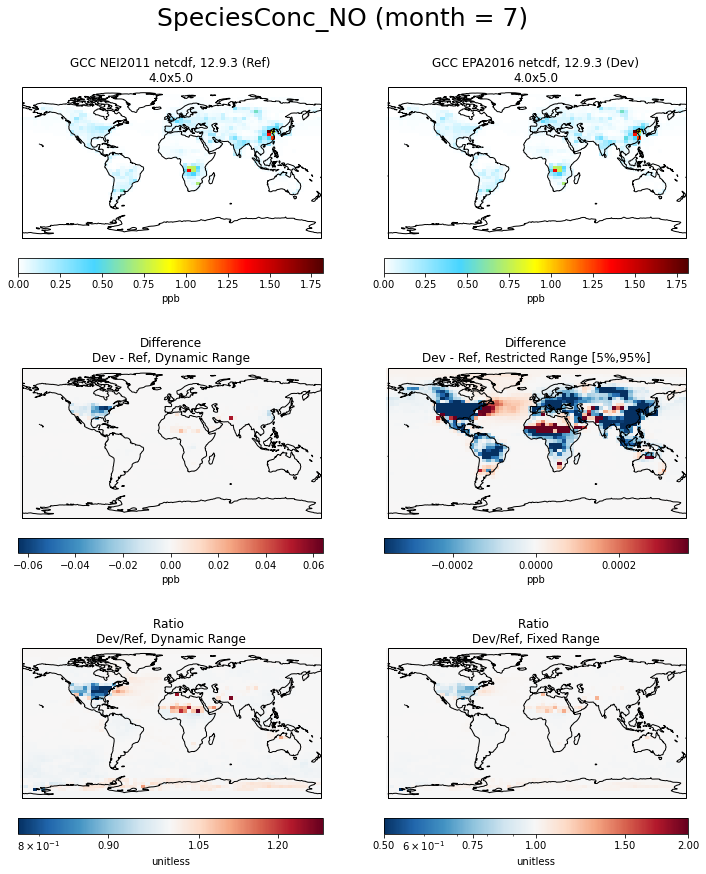

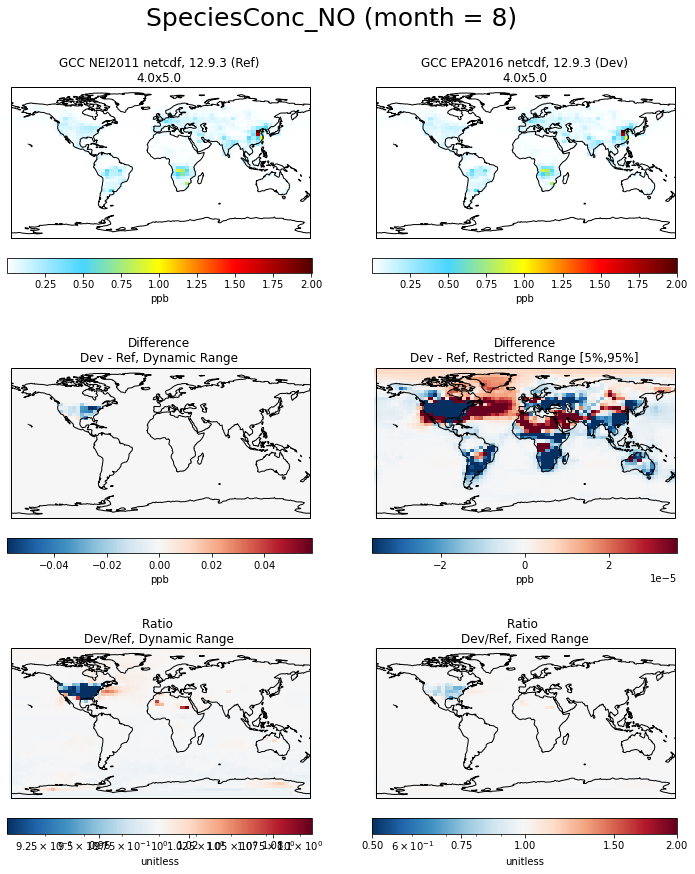

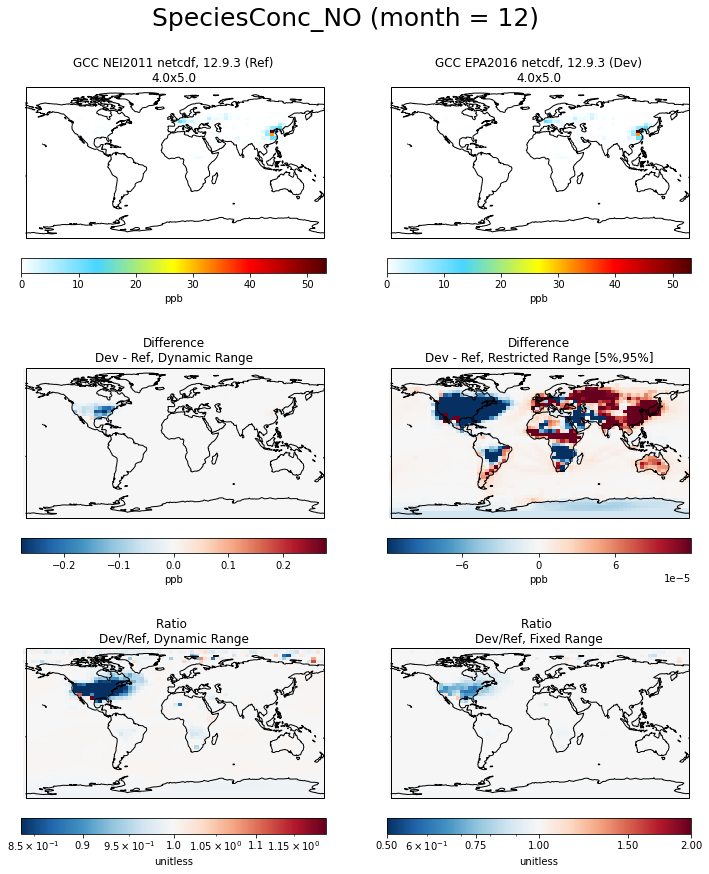

In [47]:
for idx_month in np.arange(0,12):
    gcpy.compare_single_level(refdata, refstr, devdata, devstr, itime = idx_month, varlist=['SpeciesConc_NO'], 
                              extra_title_txt=f'month = ' + str(idx_month+1))


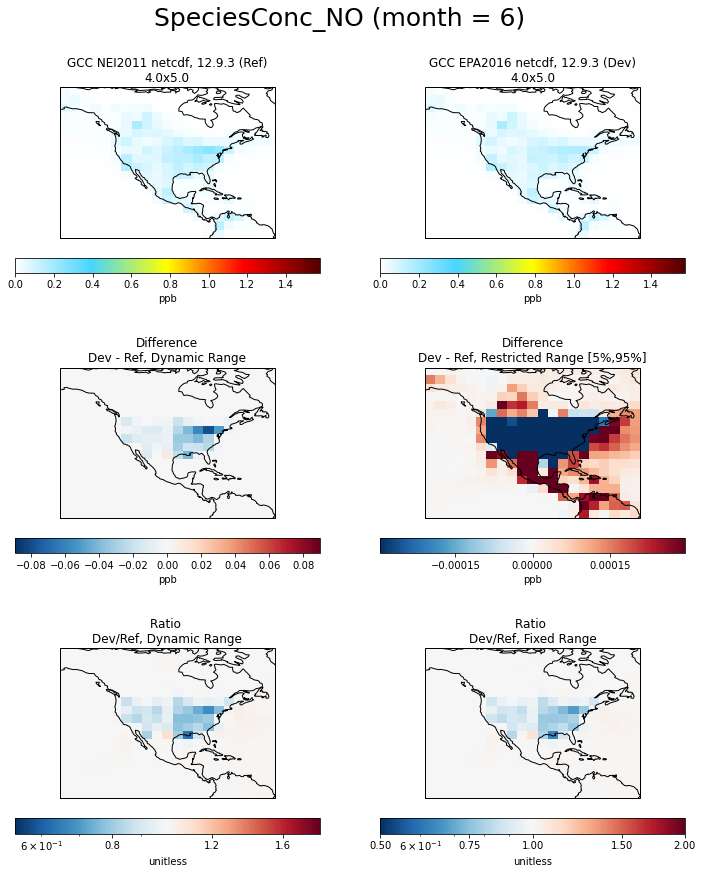

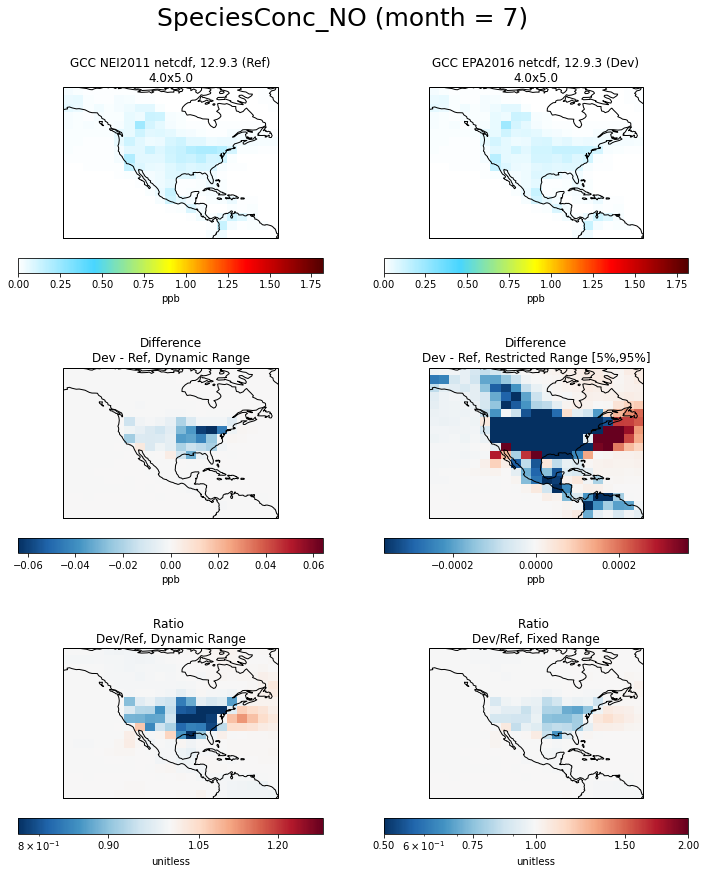

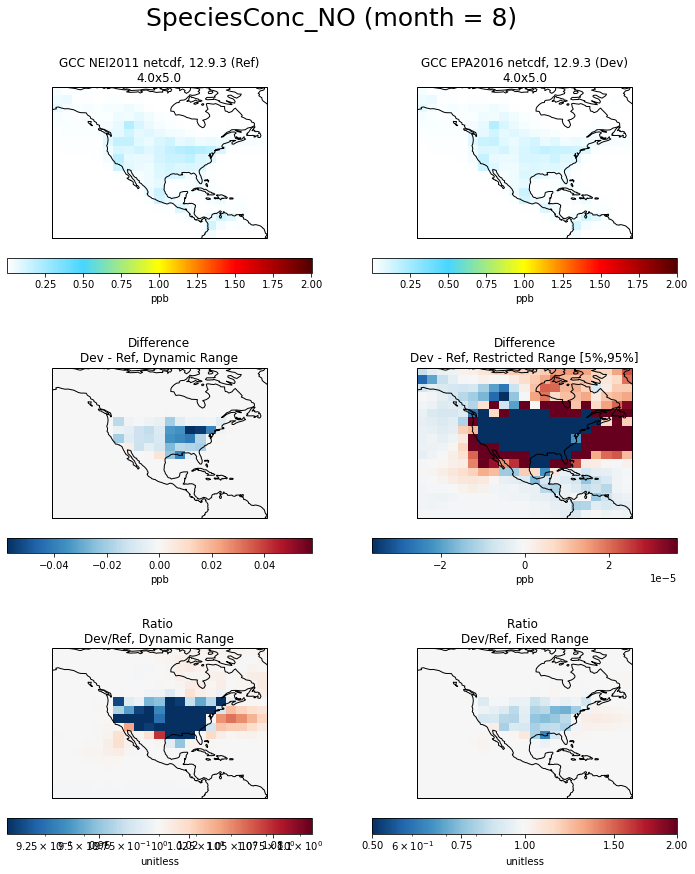

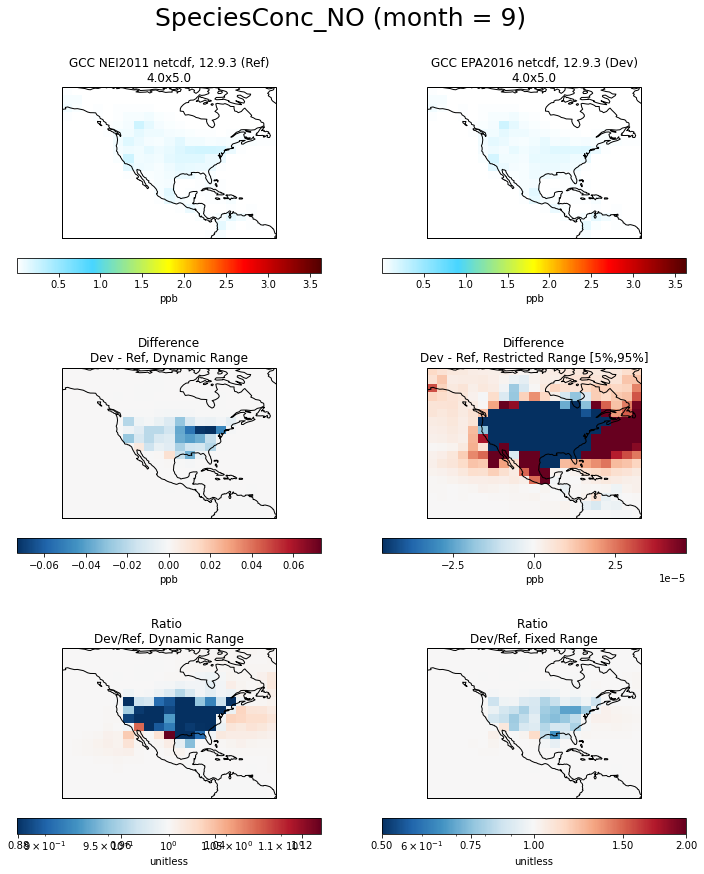

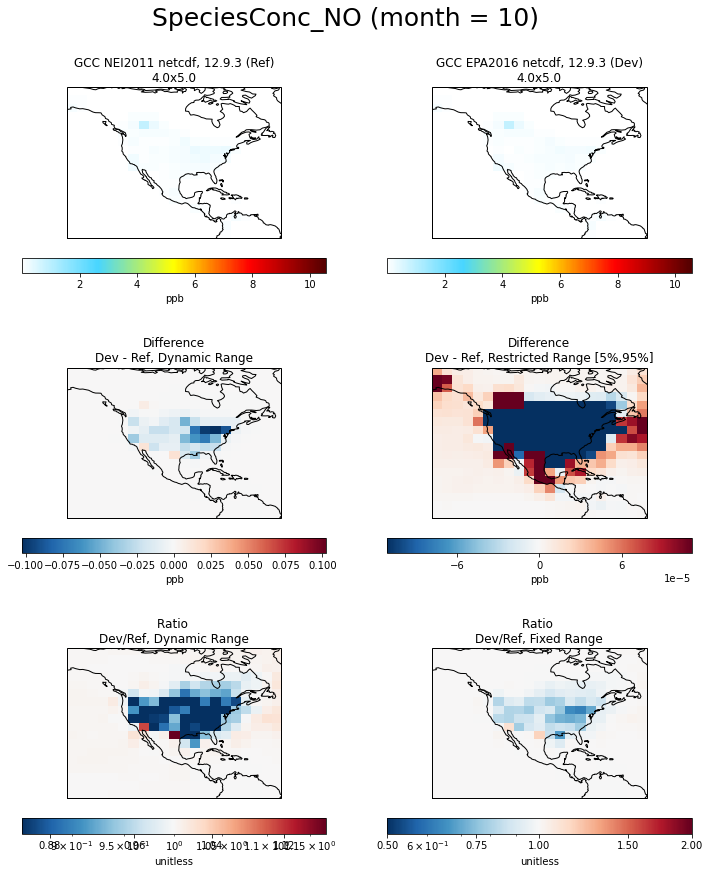

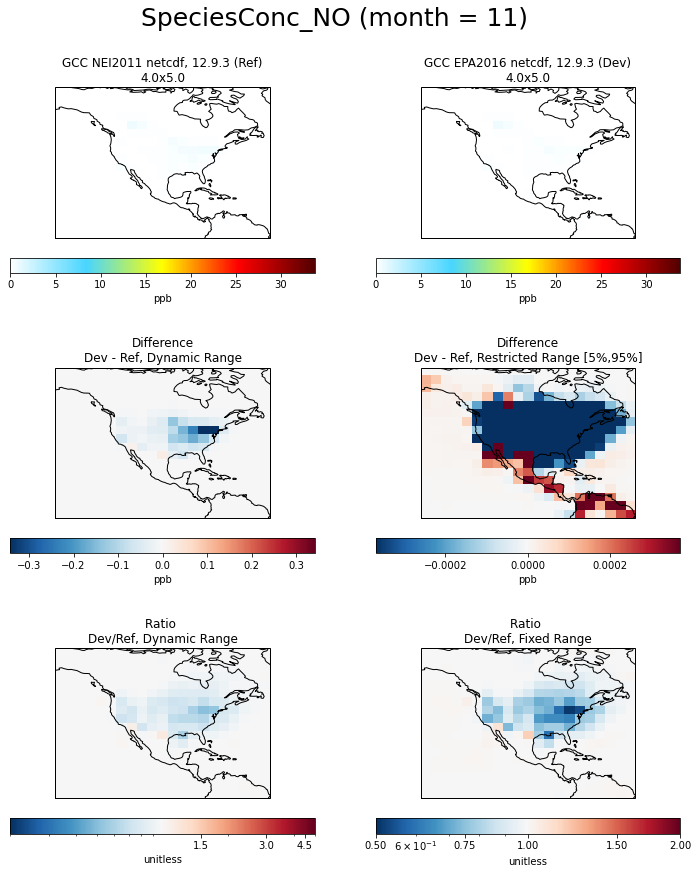

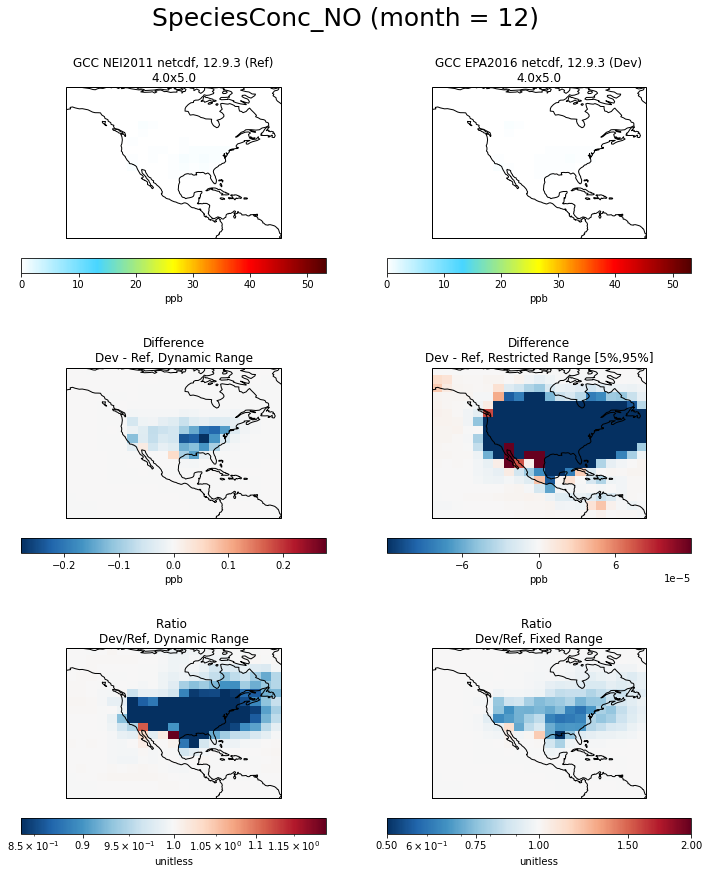

In [48]:
for idx_month in np.arange(0,12):
    gcpy.compare_single_level(refdata, refstr, devdata, devstr, itime = idx_month, varlist=['SpeciesConc_NO'], 
                              extra_title_txt=f'month = ' + str(idx_month+1), plot_extent = [-150, -50, 0, 70])

### Plot Zonal Means

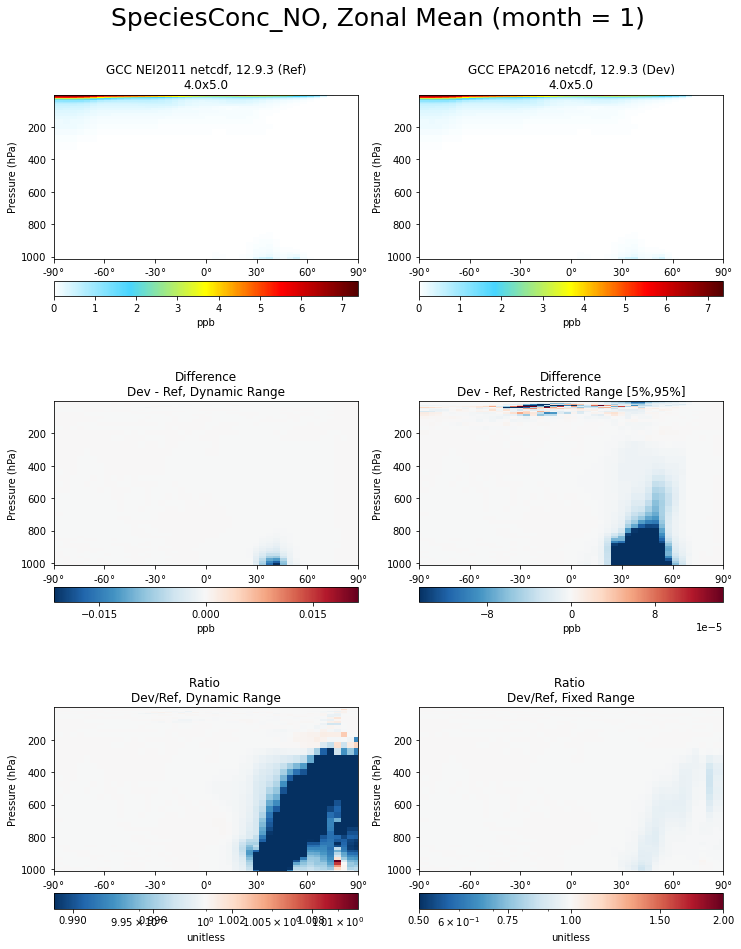

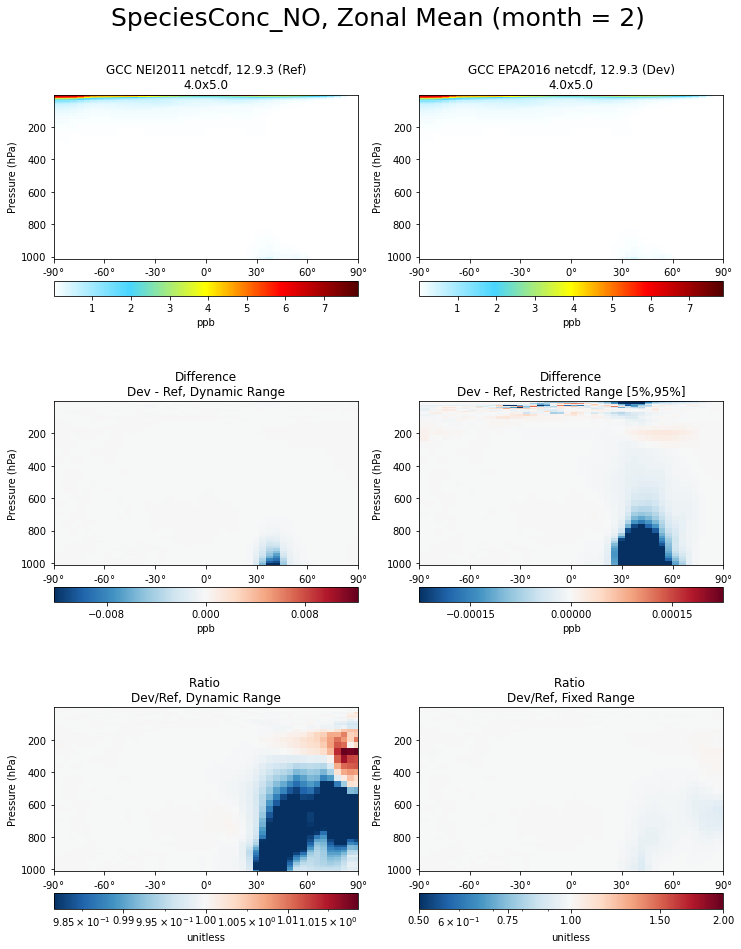

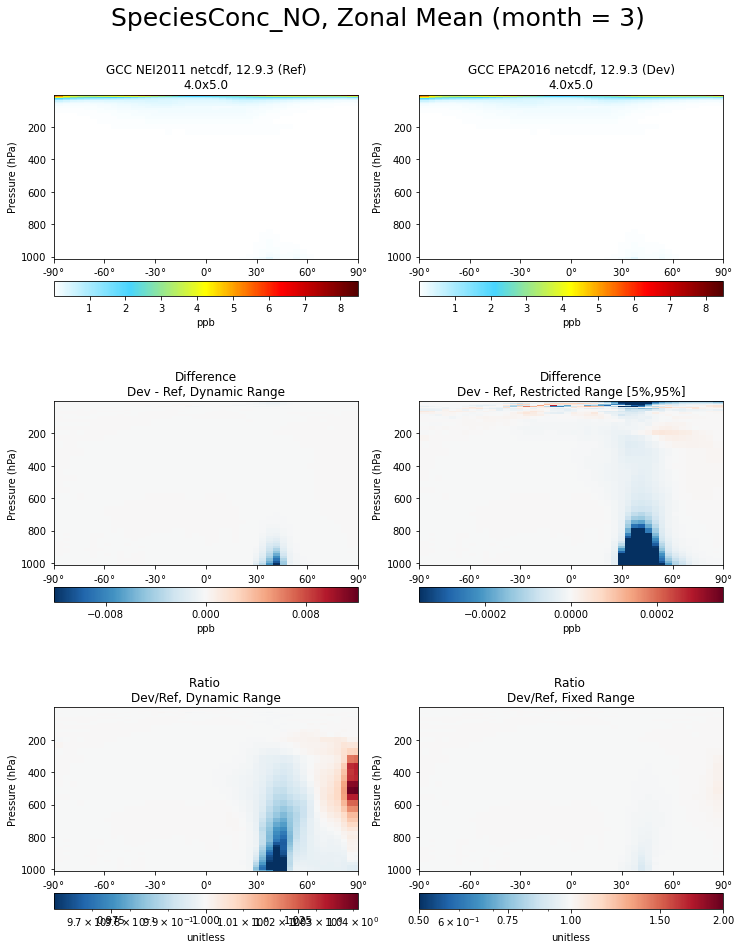

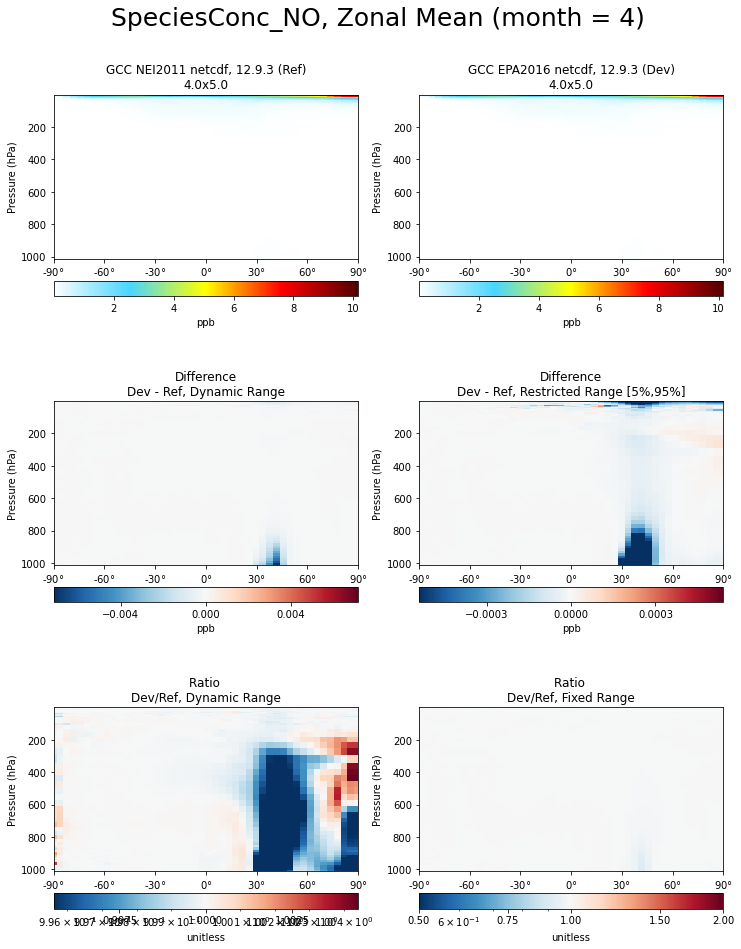

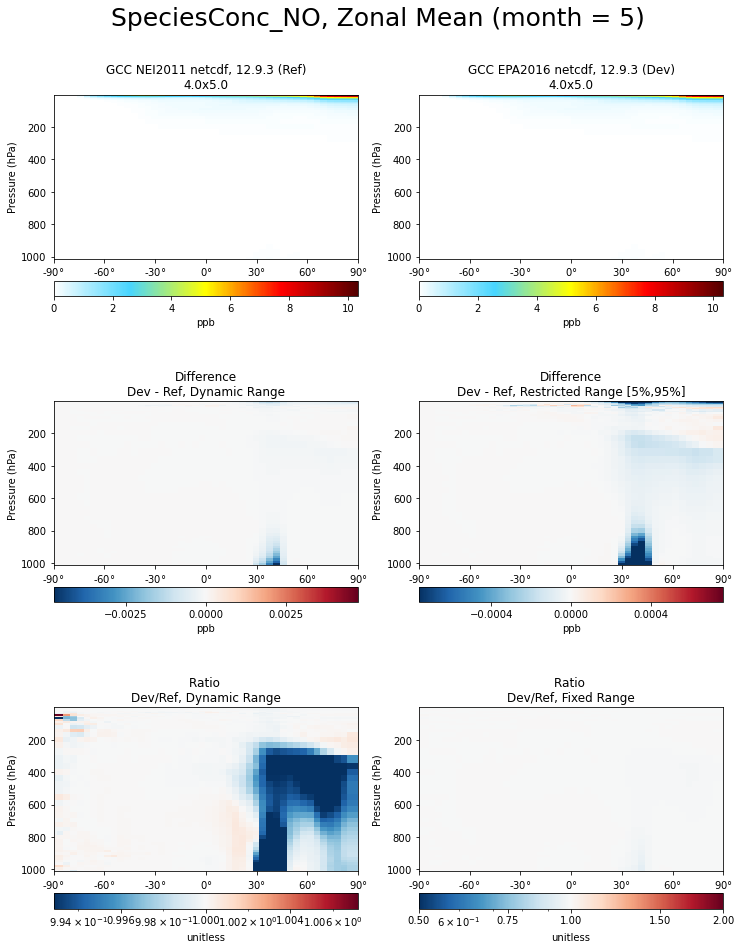

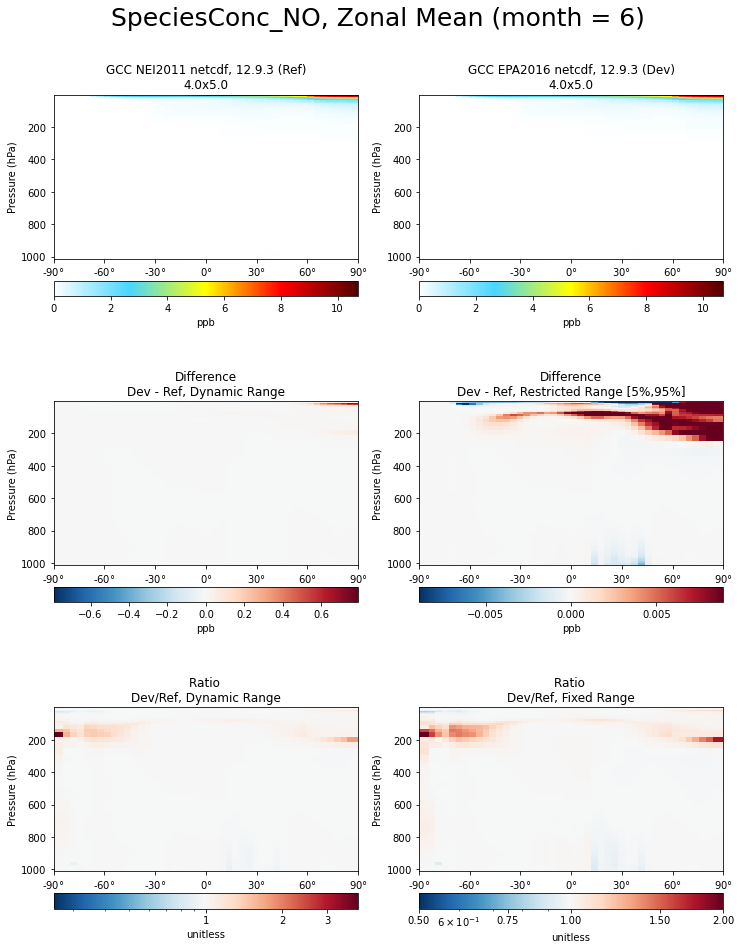

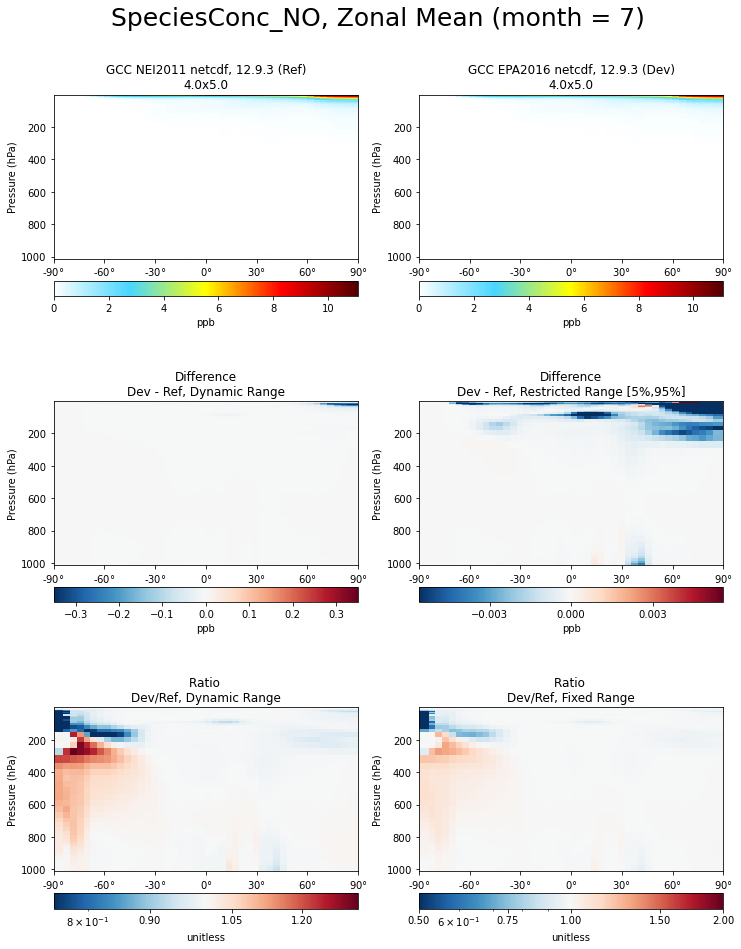

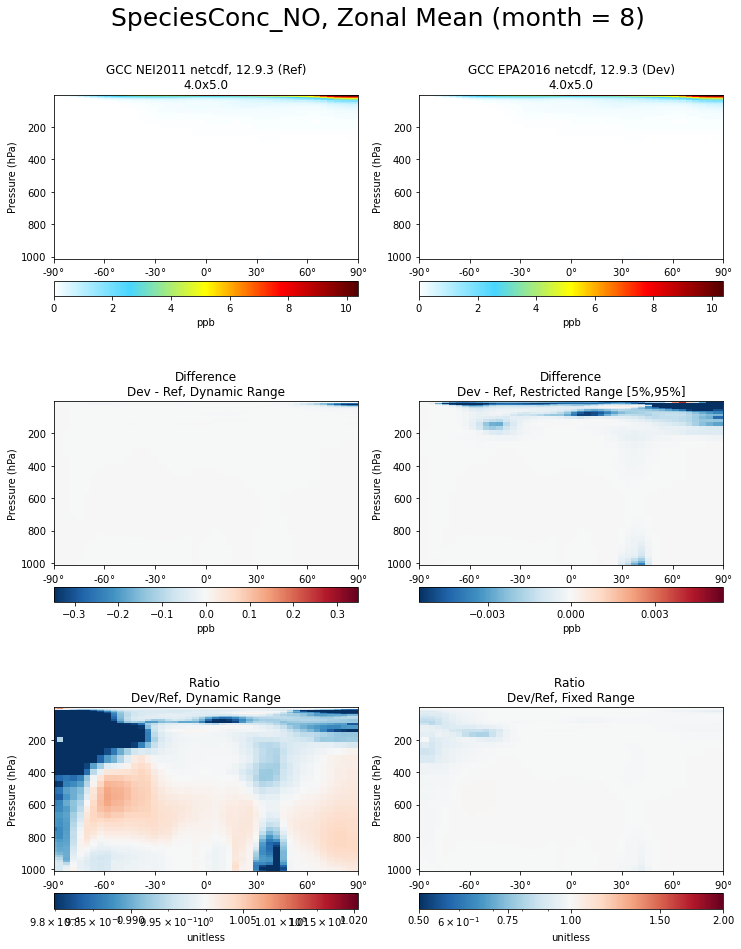

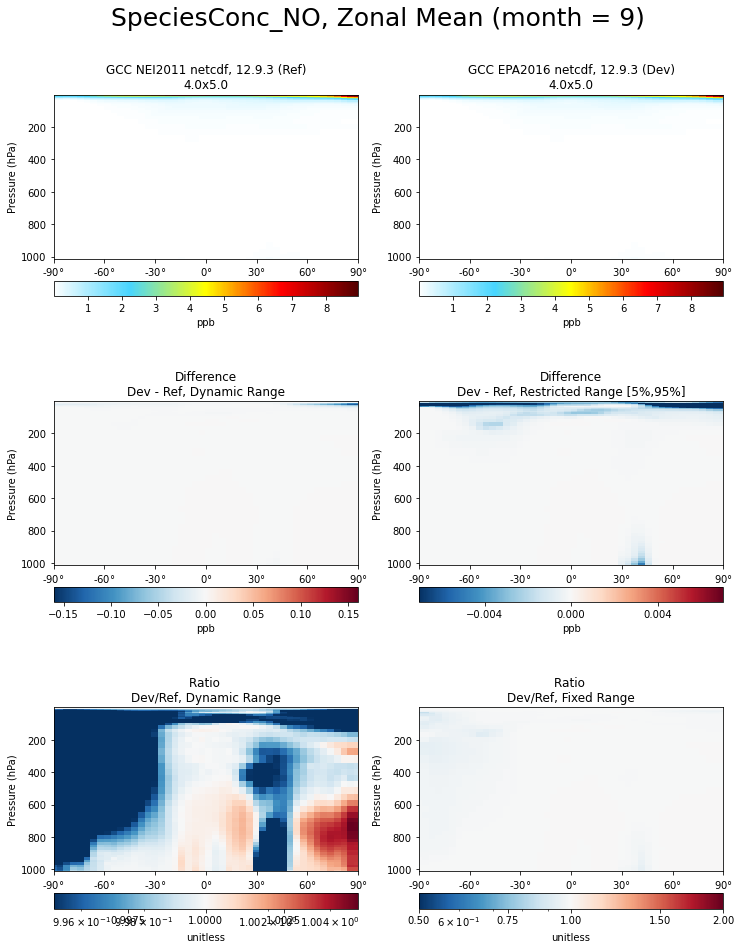

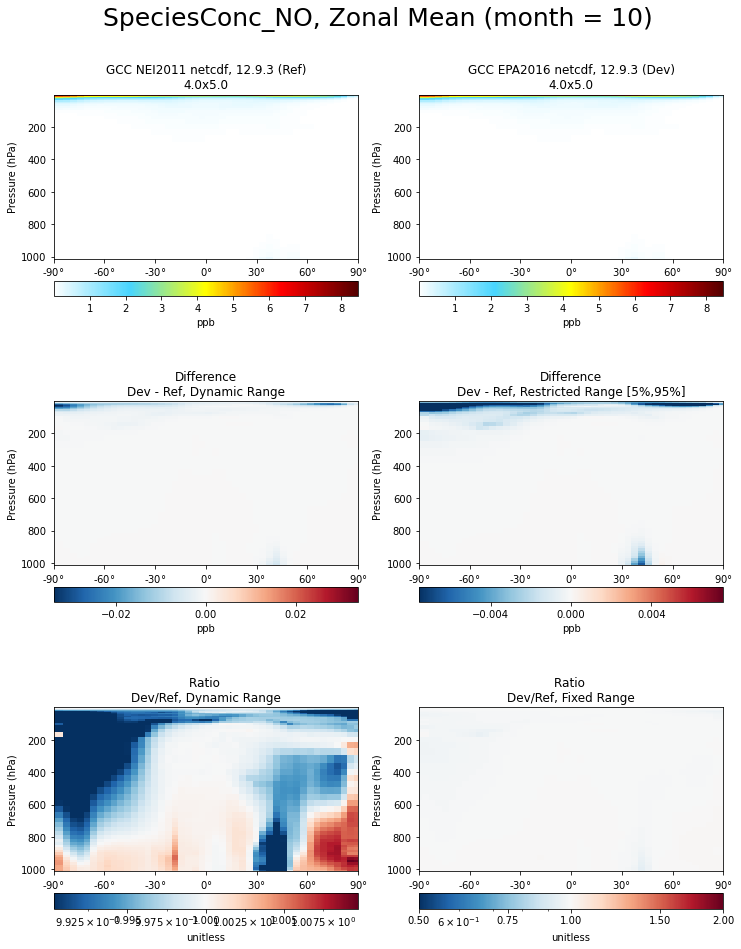

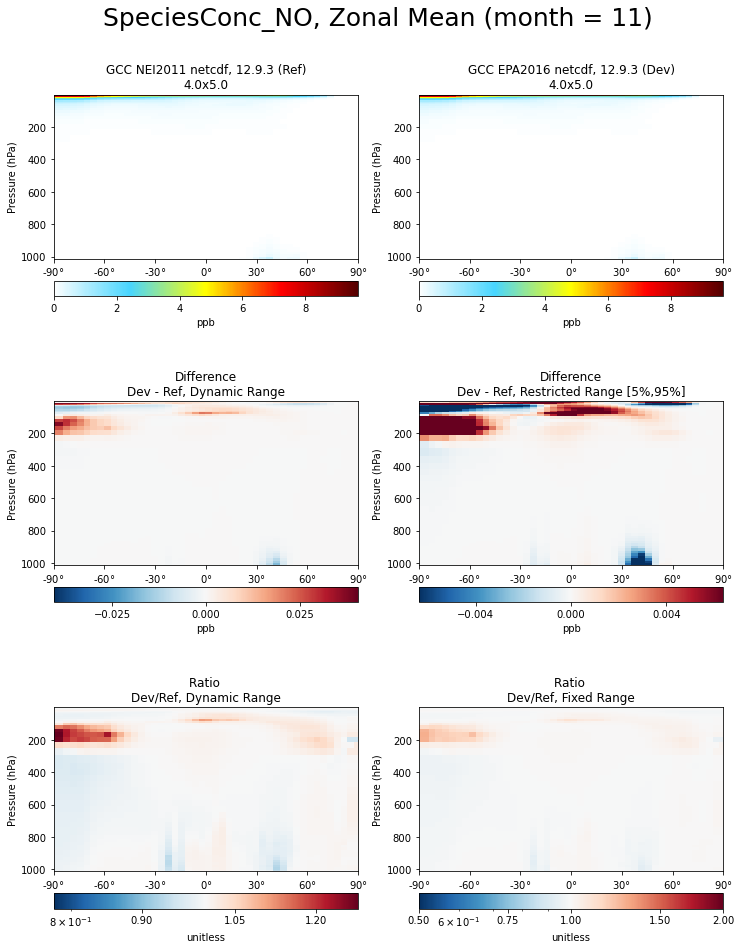

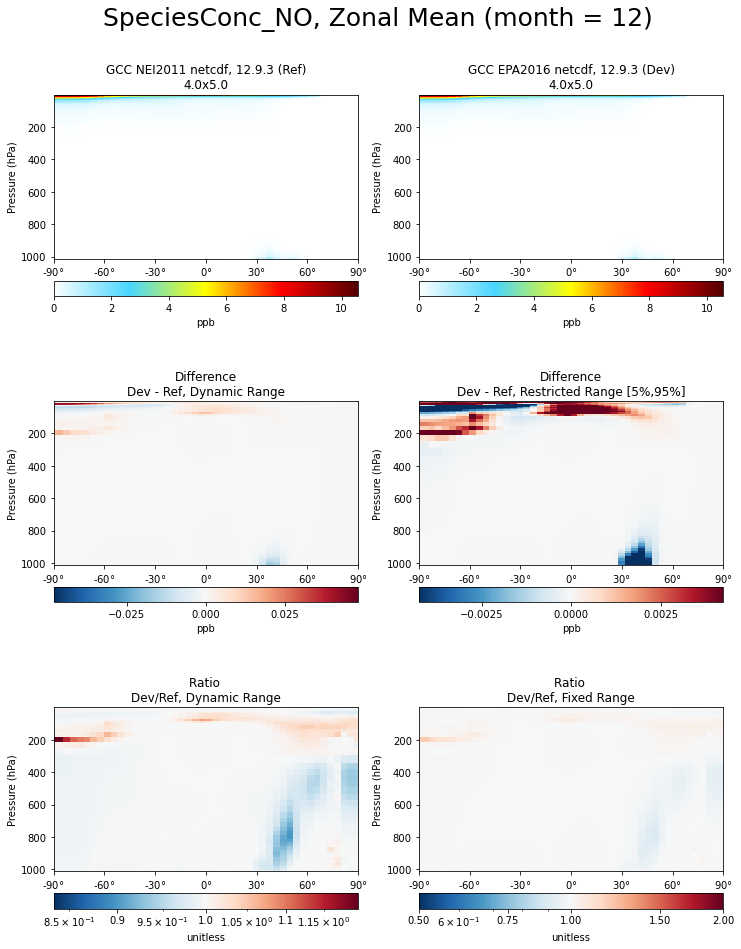

In [50]:
# Zonal mean - quick plot
for idx_month in np.arange(0,12):
    gcpy.compare_zonal_mean( refdata, refstr, devdata, devstr, varlist=['SpeciesConc_NO'], 
                              extra_title_txt=f'month = ' + str(idx_month+1), itime = idx_month)

### Send plots to PDF
If you want to a create a pdf with more than one species then redefine varlist prior to passing to plot functions.

In [11]:
# This directory must already exist
plotsdir = './figures'

In [12]:
# Surface - PDF
pdfname = os.path.join(plotsdir,'{}_surface_{}_diag.pdf'.format(desc,comparison))
gcpy.compare_single_level( refdata, refstr, devdata, devstr, varlist=varlist, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')

In [13]:
# Zonal mean - PDF
pdfname = os.path.join(plotsdir,'{}_zonalmean_{}_diag.pdf'.format(desc, comparison))
gcpy.compare_zonal_mean( refdata, refstr, devdata, devstr, varlist=varlist, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')